In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ruta ='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv'
df = pd.read_csv(ruta)
df.head()

,Date,Open,High,Low,Close,Adj Close
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


 Guarde en un Dataframe los datos de los precios de las acciones de Tesla (TSLA.csv en Github) y realice lo siguiente:

Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.

Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

Obtenga las gráficas de caja por mes de los precios de cierre del 2022.

¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
df.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [19]:
# DataFrame para fechas a partir del 2020
df_desde_2020 = df.loc['2020-01-01':]

# Obtener el precio de cierre más alto y más bajo
precio_maximo = df_desde_2020['Close'].max()
precio_minimo = df_desde_2020['Close'].min()

precio_maximo

409.970001

In [20]:
precio_minimo

24.081333

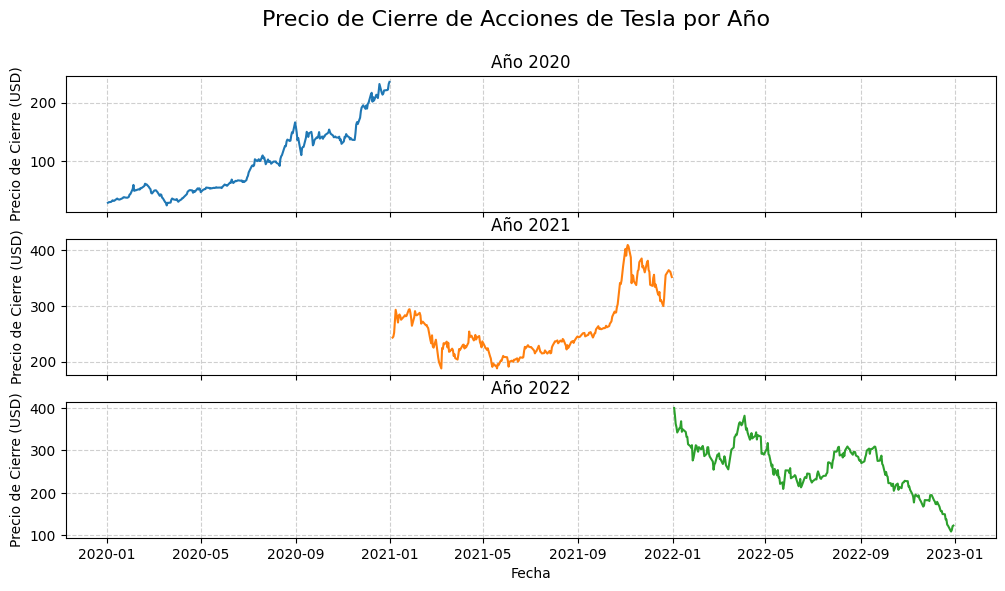

In [23]:
años = df.index.year.unique()
fig, axes = plt.subplots(nrows=len(años), ncols=1, figsize=(12, 2 * len(años)), sharex=True)
fig.suptitle('Precio de Cierre de Acciones de Tesla por Año', fontsize=16, y=0.99)

for i, año in enumerate(años):
    df_año = df.loc[str(año)]

    axes[i].plot(df_año.index, df_año['Close'], label=f'Cierre {año}', color=f'C{i}')
    axes[i].set_title(f'Año {año}')
    axes[i].set_ylabel('Precio de Cierre (USD)')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Fecha')
plt.show()

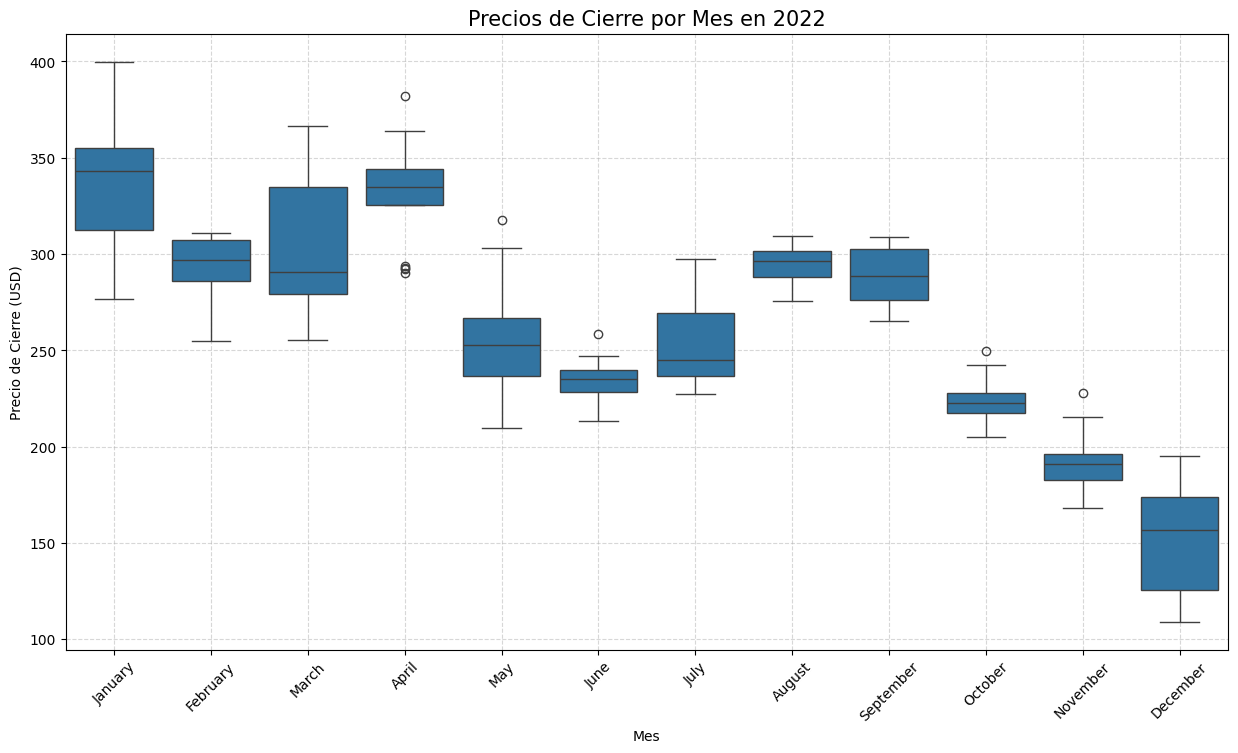

In [39]:
df_2022 = df.loc['2022'].copy() # Uso el copy() para no modificar el original
df_2022['Mes'] = df_2022.index.month_name()

orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'] #si los ppngo en español desaparecen

plt.figure(figsize=(15, 8))
sns.boxplot(x='Mes', y='Close', data=df_2022, order=orden_meses)
plt.title('Precios de Cierre por Mes en 2022', fontsize=15)
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Guarde en un Dataframe los datos de los contaminantes principales de la zona centro de la CDMX durante el año 2021 (rama2021.xlsx en Github) y realice lo siguiente:

Obtenga las gráficas de series de tiempo de los contaminantes.

Obtenga los histogramas delos contaminantes.

Obtenga un Dataframe con el resumen de 5 números, asimetría y kurtosis para todos los contaminantes.

Obtenga los gráficos de caja de los contaminantes. ¿Cuál contaminante fué el que más detectado durante 2021?

Realice una prueba de contraste de normalidad de los datos.

De acuerdo a la prueba obtenida anteriormente. ¿Cuál es el coeficiente de correlación apropiado para obtener la correlación entre los contaminantes?

Obtenga una matríz de correlación de los contaminantes y un mapa de calor. Además, obtenga un Dataframe que muestre la correlación 2 a 2 entre los contaminantes.

Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.

Obtenga una gráfica que muestre todos los diagrama de dispersión entre todos los contaminantes.

Compruebe si existe correlación entre los contaminantes y los factores meteorológicos contenidos en redmet_2021.csv en Github.

Escriba son sus conclusiones.

In [51]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2021.csv'

In [52]:
df=pd.read_csv(ruta)
df.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2021-01-01,0.417782,5.712963,16.977273,23.261574,29.765494,54.327273,28.594855,1.125912
1,2021-01-02,0.515087,14.289894,26.782609,42.090426,33.647969,48.196481,23.465409,1.725000
2,2021-01-03,0.446905,12.328571,22.773256,35.714286,28.135823,39.091988,16.423676,1.548983
3,2021-01-04,0.580398,22.323040,31.306483,54.418052,28.824532,52.486239,23.160000,3.410019
4,2021-01-05,0.533105,19.386091,29.376218,49.995204,28.941374,55.916667,22.694444,5.251366


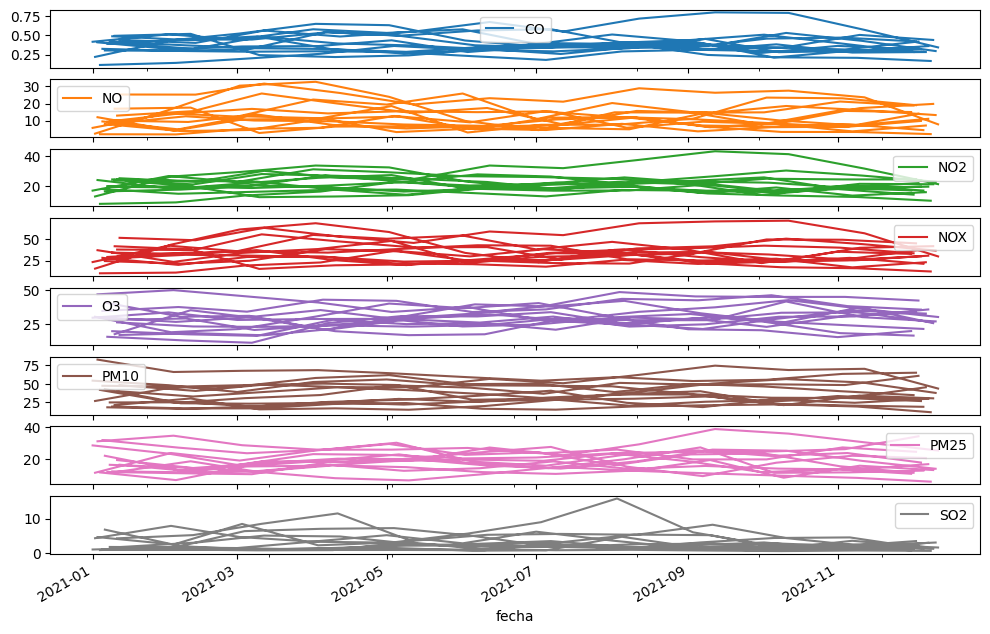

In [59]:
fecha = [c for c in df.columns if "fecha" in c.lower()][0]
df[fecha] = pd.to_datetime(df[fecha], dayfirst=True, errors="coerce")
df.set_index(fecha, inplace=True)

df.plot(subplots=True, figsize=(12, 8))
plt.show()

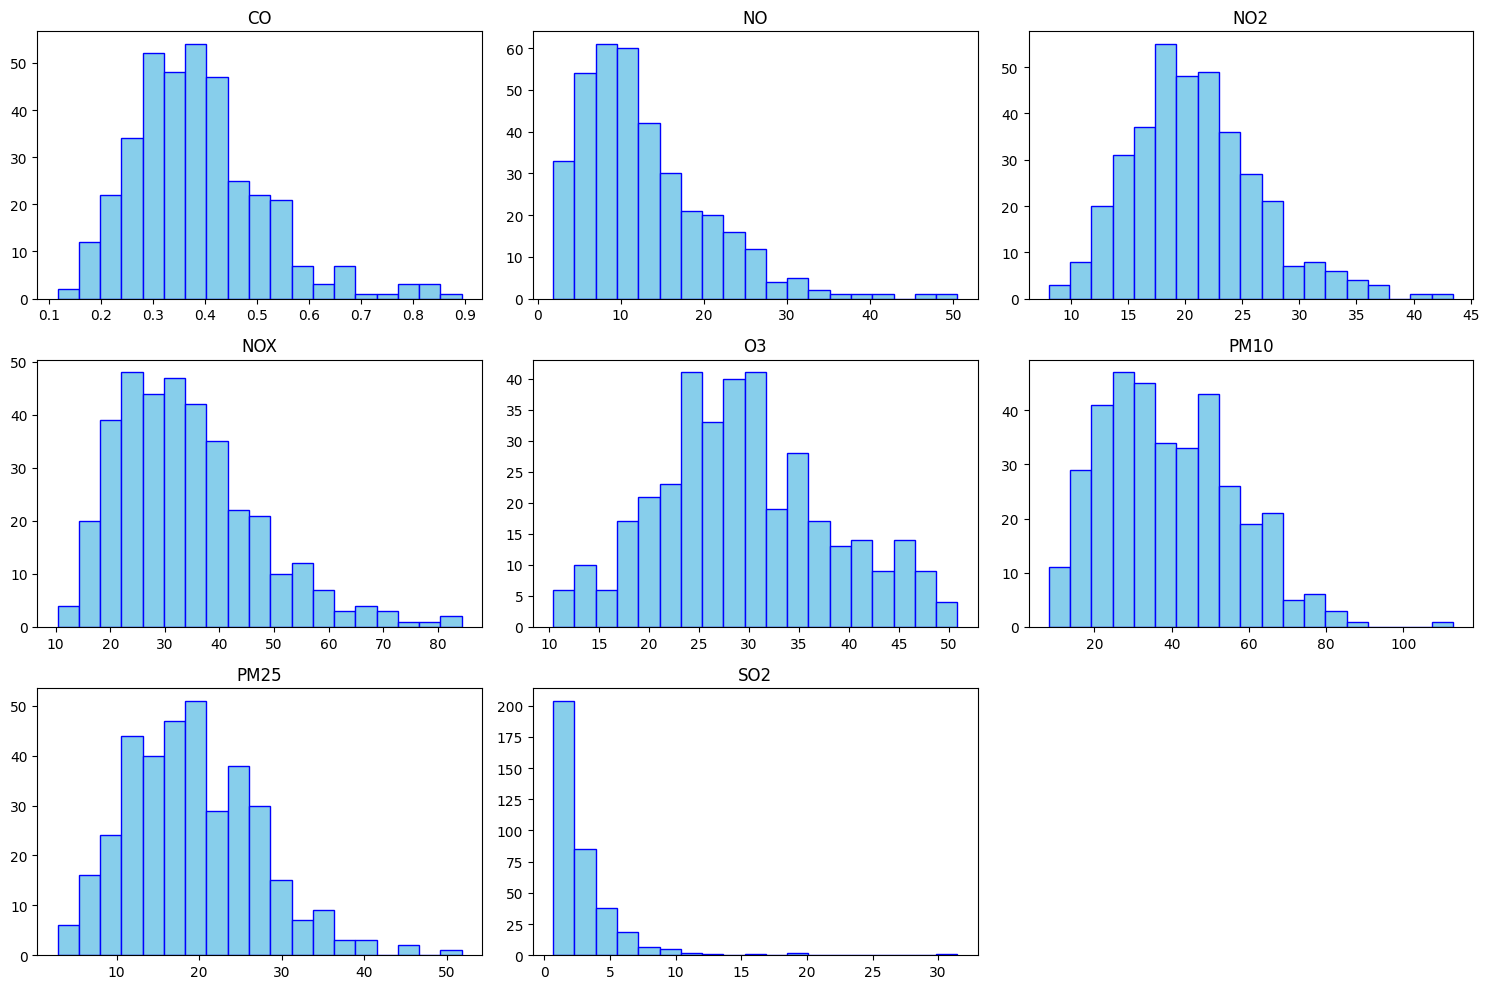

In [61]:
plt.figure(figsize=(15, 10)) # Increased figure size
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i) # Changed grid to 3x3
    plt.hist(df[col], bins=19, color='skyblue', edgecolor='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [62]:
resumen = df.describe().T
resumen['asimetría'] = df.skew()
resumen['kurtosis']  = df.kurt()
print(resumen)

      count       mean        std        min        25%        50%        75%  \
CO    365.0   0.384393   0.126995   0.115917   0.296603   0.369077   0.444241   
NO    365.0  12.764627   7.759406   1.873711   7.122040  11.108635  16.378723   
NO2   365.0  20.856912   5.716643   8.061630  16.982229  20.339921  24.280749   
NOX   365.0  34.092821  13.004546  10.345588  24.577778  32.207675  40.394958   
O3    365.0  29.513921   8.720568  10.424825  23.554364  28.938838  35.089474   
PM10  365.0  39.468897  17.125668   8.218487  25.756522  36.848485  50.811414   
PM25  365.0  19.243143   7.956069   2.849315  13.446945  18.608333  24.212329   
SO2   365.0   2.926998   2.889931   0.672474   1.328494   2.059041   3.414747   

             max  asimetría   kurtosis  
CO      0.892700   0.980338   1.610452  
NO     50.499048   1.319527   2.470978  
NO2    43.454073   0.667754   0.889447  
NOX    84.385199   0.986272   1.223836  
O3     50.881068   0.257157  -0.363118  
PM10  112.847769   0.537

/tmp/ipython-input-64-1580670105.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.dropna(), labels=df.columns, vert=False)


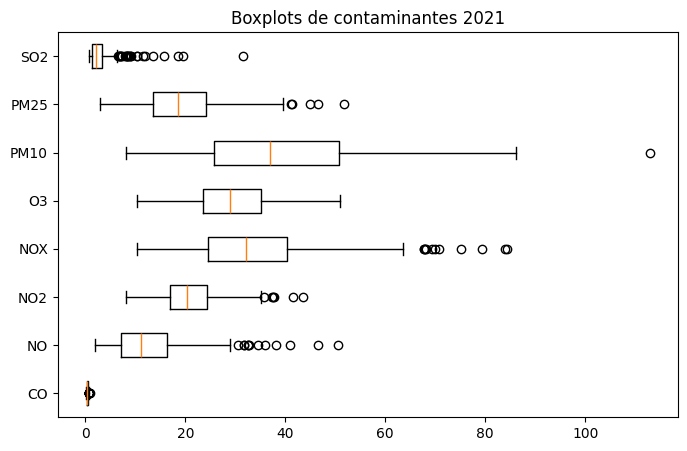

Contaminante con mayor concentración media en 2021: PM10


In [64]:
plt.figure(figsize=(8,5), dpi=100)
plt.boxplot(df.dropna(), labels=df.columns, vert=False)
plt.title("Boxplots de contaminantes 2021")
plt.show()

mas_detectado = df.mean().idxmax()
print("Contaminante con mayor concentración media en 2021:", mas_detectado)

In [65]:
from scipy.stats import shapiro
columnas = df.columns

# Prueba de Shapiro-Wilk
for col in columnas:
    estadistico, p = shapiro(df[col].dropna())
    print(col, "Estadístico =", round(estadistico, 4), "p-value =", round(p, 10))


CO Estadístico = 0.9492 p-value = 7e-10
NO Estadístico = 0.9071 p-value = 0.0
NO2 Estadístico = 0.9756 p-value = 7.7785e-06
NOX Estadístico = 0.9449 p-value = 2e-10
O3 Estadístico = 0.9864 p-value = 0.0016302531
PM10 Estadístico = 0.9722 p-value = 1.8406e-06
PM25 Estadístico = 0.9758 p-value = 8.5095e-06
SO2 Estadístico = 0.6223 p-value = 0.0


#Como en la prueba de Shapiro-Wilk los valores p fueron menores a 0.05, eso nos indica que los datos no siguen una distribución normal, por lo tanto hay que usar spearman

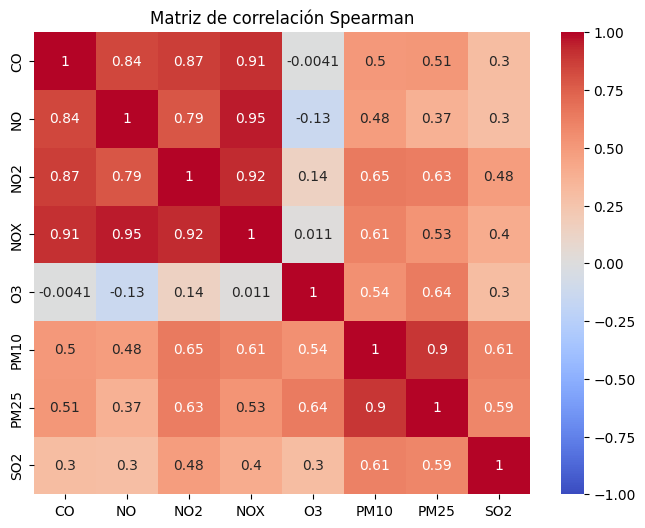

   Variable 1 Variable 2  Correlación
11         NO        NOX     0.954812
19        NO2        NOX     0.924388
3          CO        NOX     0.906800
46       PM10       PM25     0.895745
2          CO        NO2     0.873391
1          CO         NO     0.843404
10         NO        NO2     0.785366
21        NO2       PM10     0.645877
38         O3       PM25     0.640220
22        NO2       PM25     0.630509
47       PM10        SO2     0.611600
29        NOX       PM10     0.607047
55       PM25        SO2     0.588893
37         O3       PM10     0.539238
30        NOX       PM25     0.529378
6          CO       PM25     0.512779
5          CO       PM10     0.504046
13         NO       PM10     0.484106
23        NO2        SO2     0.478446
31        NOX        SO2     0.404369
14         NO       PM25     0.371816
39         O3        SO2     0.301324
7          CO        SO2     0.299368
15         NO        SO2     0.295461
20        NO2         O3     0.143831
28        NO

In [68]:
import seaborn as sns
corr = df.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación Spearman")
plt.show()

corr_2a2 = corr.unstack().reset_index()
corr_2a2.columns = ['Variable 1', 'Variable 2', 'Correlación']
corr_2a2 = corr_2a2[corr_2a2['Variable 1'] != corr_2a2['Variable 2']]
corr_2a2 = corr_2a2.drop_duplicates(subset=['Correlación'])

print(corr_2a2.sort_values(by='Correlación', ascending=False))



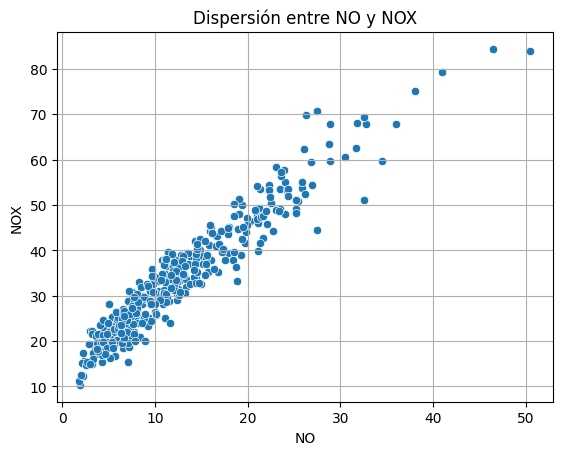

In [70]:
corr_2a2 = corr.unstack().reset_index()
corr_2a2.columns = ['X', 'Y', 'r']
corr_2a2 = corr_2a2[corr_2a2['X'] != corr_2a2['Y']]
corr_2a2 = corr_2a2.drop_duplicates(subset=['r'])
corr_2a2 = corr_2a2.sort_values(by='r', ascending=False)
x = corr_2a2.iloc[0]['X']
y = corr_2a2.iloc[0]['Y']

# Diagrama de dispersión
sns.scatterplot(data=df, x=x, y=y)
plt.title(f"Dispersión entre {x} y {y}")
plt.grid(True)
plt.show()

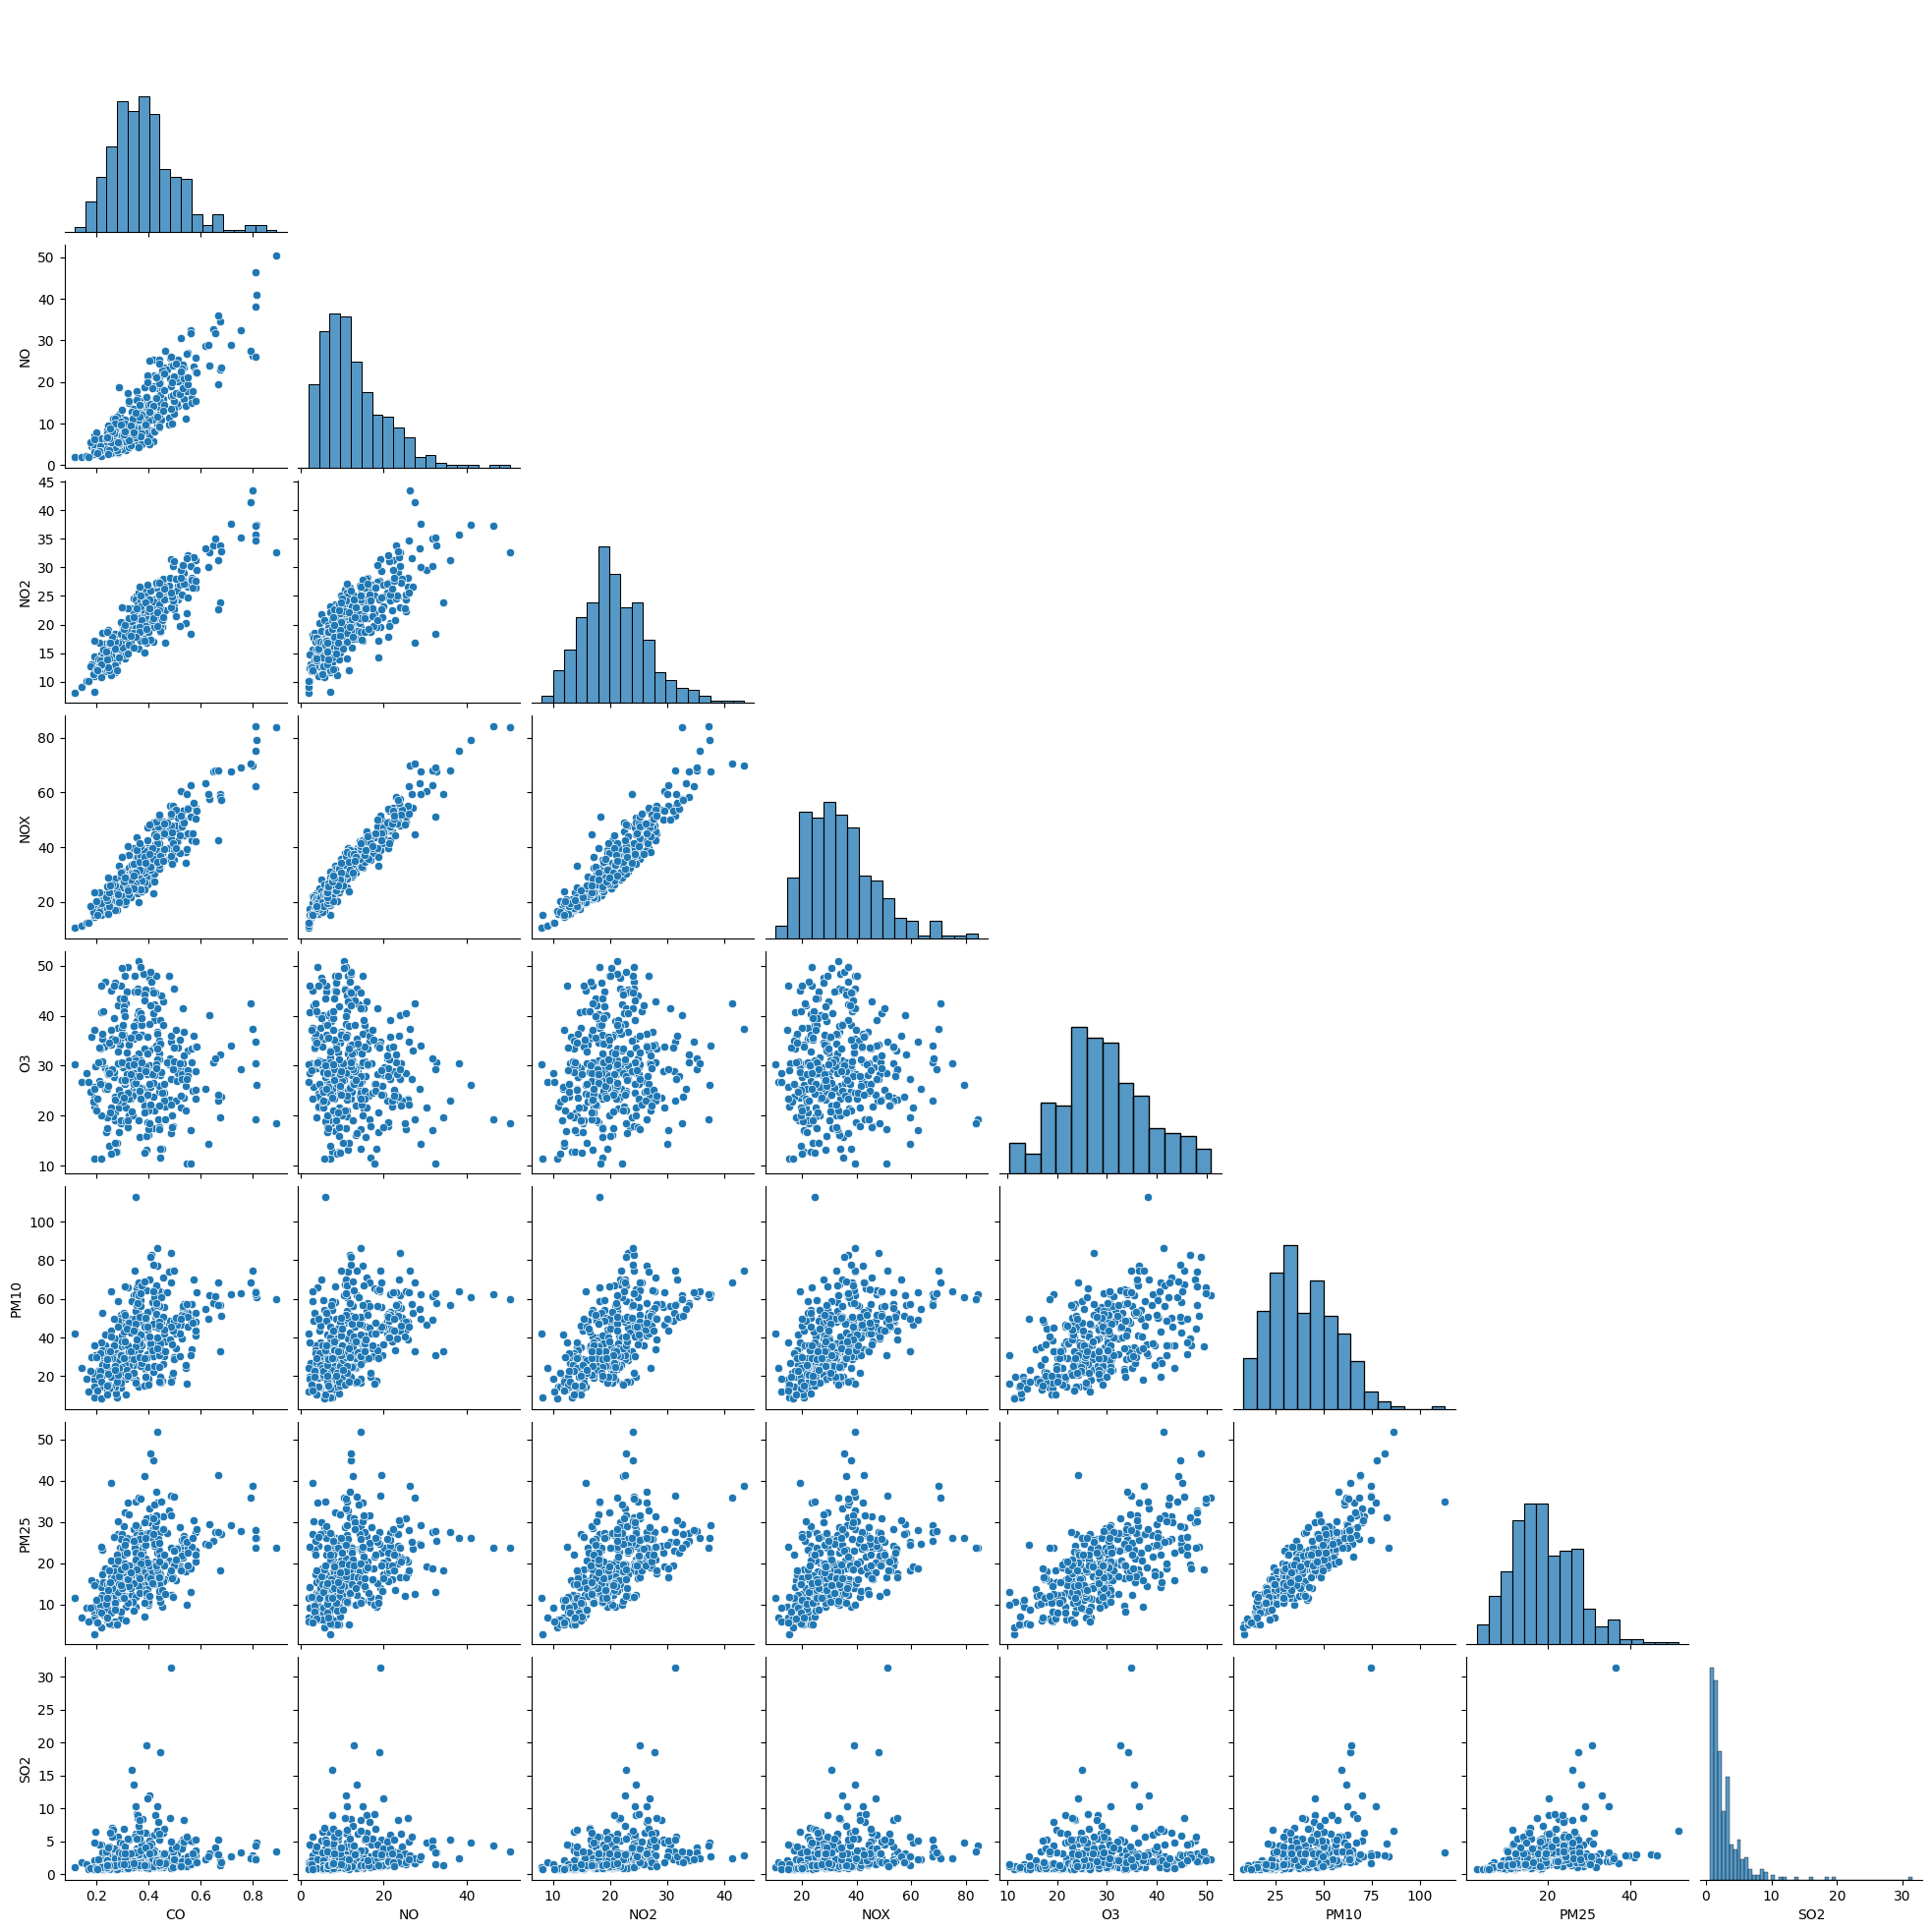

In [71]:
sns.pairplot(df, corner=True)
plt.show()

In [78]:
ruta_met = "https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/redmet_2021.csv"
met = pd.read_csv(ruta_met)

fecha_met = [c for c in met.columns if "fecha" in c.lower()][0]
met[fecha_met] = pd.to_datetime(met[fecha_met], dayfirst=True, errors='coerce')
met.set_index(fecha_met, inplace=True)

datos = pd.concat([df, met], axis=1).dropna()

In [74]:
# Matriz de correlación
corr_mat = datos.corr(method='spearman')

In [76]:
corr_cross = corr_mat.loc[df.columns, met.columns]
print(corr_cross)

            RH       TMP       WDR       WSP
CO   -0.266913 -0.222444 -0.337801 -0.689216
NO   -0.354907 -0.278497 -0.293793 -0.502901
NO2  -0.421662 -0.232929 -0.192347 -0.628677
NOX  -0.429799 -0.255871 -0.263359 -0.577112
O3   -0.517277  0.567238 -0.156960  0.125196
PM10 -0.816510  0.105944 -0.171011 -0.102048
PM25 -0.613008  0.226741 -0.176270 -0.232602
SO2  -0.442989 -0.080853  0.148412 -0.227303


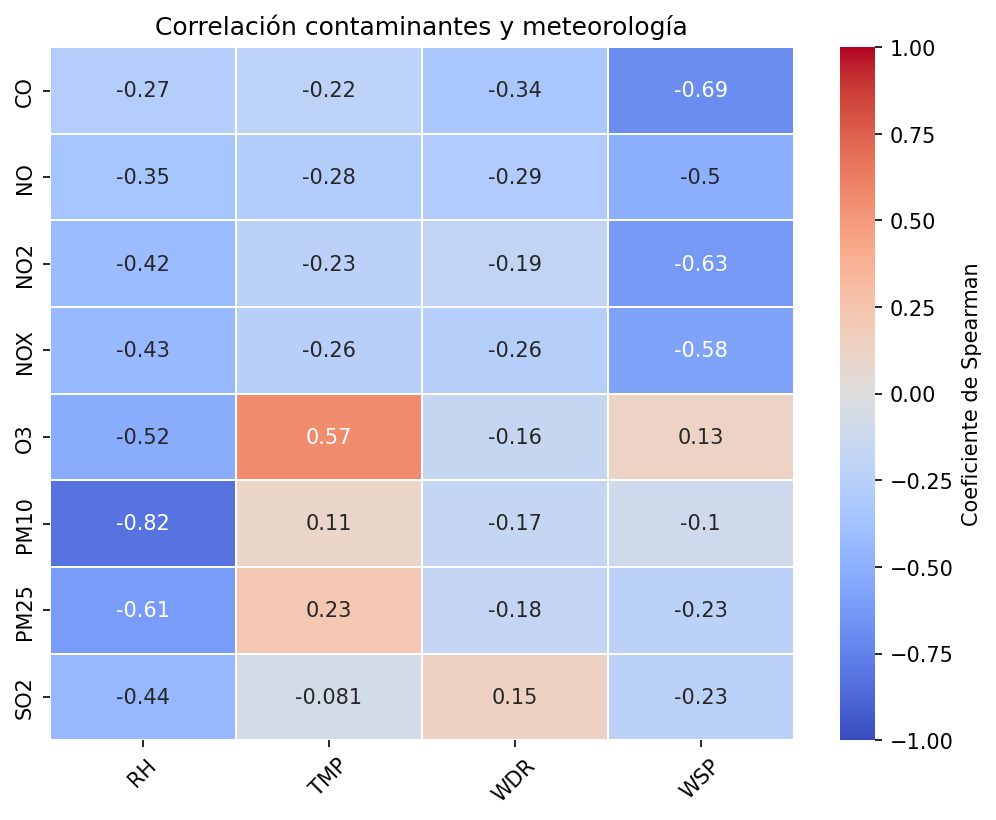

In [77]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(corr_cross, annot=True, cmap='coolwarm', linewidths=0.2,
            cbar_kws={'label': 'Coeficiente de Spearman'},
            vmin=-1, vmax=1, center=0)
plt.title('Correlación contaminantes y meteorología')
plt.xticks(rotation=45)
plt.show()

#Durante el 2021, en la zona centro de Ciudad de México, los niveles de contaminantes cambiaron a lo largo del tiempo, con algunos picos que probablemente se debieron a cambios en el clima o a actividades cotidianas, como el tráfico. Al analizar los datos, notamos que la mayoría de los contaminantes no siguen una distribución normal, lo que indica que sus concentraciones varían bastante y no son tan predecibles. Por eso, para medir cómo se relacionan entre sí, usamos el coeficiente de correlación de Spearman, que funciona mejor en estos casos. El contaminante que más se detectó en promedio fue el PM10, es decir, las partículas suspendidas en el aire.
#También vimos que algunos contaminantes, como el dióxido de nitrógeno y el monóxido de carbono, están relacionados, probablemente porque provienen de los carros.
#Cuando juntamos los datos meteorológicos, encontramos que el clima también influye: por ejemplo, el ozono parece estar ligado a la temperatura. Las gráficas de dispersión y los mapas de calor nos ayudaron a entender mejor estas conexiones, mostrando visualmente cómo los contaminantes y el clima interactúan. En resumen, este análisis nos da informacion importantes sobre la calidad del aire, teniendo en cuenta tanto las emisiones como las condiciones del ambiente.